![challenge header](https://raw.githubusercontent.com/robynfsj/cfg-big-data-challenge/master/images/header.jpg?token=ANPGOVNWGP52LH4EC2QDSYK7NOQV2)

## Team M
Laura Ramoskaite  
Dimitra Charalampopoulou    
Güzide Sofi  
Robyn Seymour-Jones  

[View full project on GitHub](https://github.com/robynfsj/cfg-big-data-challenge)
***

# The effects of COVID-19 lockdown measures on the supply and demand of electricity in the UK

## 1. Introduction

A new type of coronavirus and COVID-19, the disease it causes, has been occupying the world's agenda for the last 9 months. As cases peaked in late March and early April 2020 in the EU and the UK, many countries implemented a range of measures to decrease the burden on the healthcare systems, and this led to a fall in cases. Specifically in the UK, a lockdown was implemented on 23rd of March when the Prime Minister Boris Johnson told people they must stay at home and some businesses were told to close. After a gradual decline in cases, the restrictions were lifted or relaxed. While many countries, including the UK, are now testing mild and asymptomatic cases, which has resulted in increased case reports, there is also a true resurgence in cases as a result of physical distancing measures being relaxed. Total cases so far reported for the UK is 382K, with 41,705 deaths and the daily case number is around 3,000.

<-- Intro paragraph 2: explain why it is important to do this this challenge. Mention climate change facts (with references if possible) and the need to ensure a sustainable recovery from COVID-19 lockdown. -->

In order to reach these targets we can transition to low carbon energy sources and 
As well as moving to low carbon energy sources we want to be reducing the total amount of electricity

<-- Intro paragraph 3: explain why we are looking at electricity data in particular. Give some facts with references about CO2 emissions from UK electricity generation. -->  

The lockdown restrictions caused a large change in behaviour that has shocked the economy. 
The effects have also been felt in the energy industry. In particular, the





### Aims  
We have established the following aims that we want acheive:  
  
1. Find out what has been the impact of COVID-19 on the supply and demand of electricity in the UK.  
2. Find out what would have happened to the supply and demand of UK electricity if COVID-19 had not happened.  
  
### Objectives  
In order to acheive our aims, we will complete the following objectives:  
  
1. Plot historical data of total electricity available and sold in the UK.
2. Plot 2020 electricity available and sold against stringency to show impact of COVID on demand.  
3. Plot 2020 rolling demand to show high resolution impact of COVID lockdown measures on demand.  
4. Model total electricity sold data to see what the demand would have been without COVID. 
  
### Structure of this report
[Section 2](#2.-Methods) – describes the methods we have employed and imports the modules and libraries required.  
[Section 3](#3.-Data-import-and-checks) – imports and checks the data as well as some data wrangling such as converting to datetime.  
[Section 4](#4.-Historical-UK-electricity-supply-and-demand-prior-to-COVID-19) – explores historical electricity supply and demand in the UK during the years prior to 2020.  
[Section 5](#5.-The-impact-of-COVID-19-on-UK-electricity-supply-and-demand) – explores the impact of COVID-19 lockdown measures on electricity demand.  
[Section 6](#6.-What-would-have-happened-if-COVID-19-had-not-happened?) – models what might have happened to electricity demand in 2020 if COVID-19 hadn't happened.

---

## 2. Methods
  
### 2.1 Libraries and modules
The following packages were intalled to this project's virtual environment via pip:  
* notebook
* pandas
* matplotlib
* xlrd
* seaborn
  
The following libraries and modules are required:

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter 

### 2.2 Data collection and selection
  
#### 2.1.1 Stringency data  
In order to look at the impact that COVID-19 has had on electricity supply and demand it is necessary to understand the strictness and severity of the measures that have been put in place by the UK government that have limited the movement of people and changed their habits. To do this we have used the stringency index from the Oxford COVID-19 Government Response Tracker (OxCGRT) ([Hale et al. 2020](#References)). The stringency index was chosen over the other indicies as we are mainly concerned with the impacts of restrictions put on peoples' movements, rather than other policies such as economic ones.
  
#### 2.2.2 Electricity data  
Electricity supply is the total amount of electricity that is available while electricity demand is the total amount of electricity that end users consume. They tend to be very similar as electricity generation aims to produce only enough electricity to meet the demand. Although electricity demand is more useful in seeing how COVID-19 has affected behaviour and business in the UK, it is import to also look at supply as these data are "*generally considered to be more accurate than demand data*" ([BEIS, 2010](#References)). It is also possible to look at a breakdown of electricity supplied by different fuel types, which can be explored as we investigate the impact of COVID-19 on our transition to a more sustainable power grid.  
  
##### Electricity supply
To investigate electricity supply in the UK we used table 5.4 of *Energy Trends: UK Energy* ([BEIS, 2020](#References)). This provides us with data on the amount of electricity available in the UK public supply system, i.e. the electricity supply. It includes electricity supplied by the major power producers, electricity supplied by other smaller generators and net trade in electricity ([BEIS, 2010](#References)). As well as total available electricity, it has been split into electricity supplied by different fuel types.  
##### Electricity demand
To investigate electricity demand in the UK we used table 5.5 of *Energy Trends: UK Energy* ([BEIS, 2020](#References)). This provides data on the amount of electricity sold to end users in the UK, i.e. electricity demand.  As well a total electricity sold by all electricity producers, it also provides data on electricity sold by the major power producers split according to the final end user (industrial, domestic and other, the latter including users such as commercial premises, public administration, transport and agriculture).  
  
As the data on electricity sold is only available from the above source on a monthly resolution, we investigated alternative sources that could provide higher resolution data on demand during COVID-19 lockdown measures in 2020. We have chosen to use rolling system demand data for this ([Elexon, 2020](#References)). This provides the current electricity demand in the UK at 5 minute intervals. As this proved to be too high resolution even for what we were after, we manipulated the data in MySQL to calculate the mean rolling demand for each day and each week in 2020.

### 2.3 Predictive model
For the prediction we chose the autoregressive integrated moving average (ARIMA) model. This model is fitted to time series data, either to better understand the data or to predict future points in the series.

---

## 3. Data import and checks
  
### 3.1 Electricity supply
  
#### Total electricity available (by month)

In [2]:
# Read in data.
elec_avail = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='5.2')

# Create datetime column.
elec_avail['date'] = pd.to_datetime(elec_avail['year'].astype(str) + 
                                    elec_avail['month'].astype(str),
                                    format='%Y%B')

# Check data.
elec_avail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   306 non-null    int64         
 1   month                  306 non-null    object        
 2   electricity_available  306 non-null    float64       
 3   date                   306 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 9.7+ KB


In [3]:
elec_avail.head()

,year,month,electricity_available,date
0,1995,January,28.50,1995-01-01
1,1995,February,27.88,1995-02-01
2,1995,March,33.33,1995-03-01
3,1995,April,23.88,1995-04-01
4,1995,May,22.61,1995-05-01


#### Electricity supply by fuel type

In [4]:
elec_avail_type = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='9.2')

# Create a datetime column so it is easy to plot against time.
elec_avail_type['date'] = elec_avail_type['year'].astype(str) + elec_avail_type['month'].astype(str)
elec_avail_type['date'] = pd.to_datetime(elec_avail_type['date'],
                                         format='%Y%B')

# Transform from wide format to long format.
elec_avail_type = pd.melt(elec_avail_type,
                          id_vars=['date'],
                          value_vars=['coal', 
                                      'oil', 
                                      'gas', 
                                      'nuclear', 
                                      'hydro', 
                                      'wind',
                                      'solar',
                                      'bioenergy',
                                      'other'],
                          var_name='fuel_type',
                          value_name='electricity_available')

elec_avail_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   2538 non-null   datetime64[ns]
 1   fuel_type              2538 non-null   object        
 2   electricity_available  2538 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.6+ KB


In [5]:
elec_avail_type.head()

,date,fuel_type,electricity_available
0,1997-01-01,coal,12.194
1,1997-02-01,coal,10.306
2,1997-03-01,coal,11.289
3,1997-04-01,coal,7.216
4,1997-05-01,coal,6.231


#### Electricity supply by fuel type (renewable vs non-renewable)

In [6]:
elec_avail_renew = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='8.2')

# Create a datetime column so it is easy to plot against time.
year = elec_avail_renew['year'].astype(str)
month = elec_avail_renew['month'].astype(str)

elec_avail_renew['date'] =  year + month

elec_avail_renew['date'] = pd.to_datetime(elec_avail_type['date'],
                                         format='%Y%B')

# Transform from wide format to long format.
elec_avail_renew = pd.melt(elec_avail_renew,
                           id_vars=['date'],
                           value_vars=['non-renewable', 
                                      'renewable'],
                           var_name='fuel_type',
                           value_name='electricity_available')

elec_avail_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   564 non-null    datetime64[ns]
 1   fuel_type              564 non-null    object        
 2   electricity_available  564 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.3+ KB


In [7]:
elec_avail_renew.head()

,date,fuel_type,electricity_available
0,1997-01-01,non-renewable,28.064493
1,1997-02-01,non-renewable,26.667702
2,1997-03-01,non-renewable,30.309155
3,1997-04-01,non-renewable,22.200902
4,1997-05-01,non-renewable,21.552039


### 3.2 Electricity demand  
  
#### Total electricity sold by month

In [8]:
# Read in data.
elec_sold = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='6.2')

# Create a datetime column so it is easy to plot against time.
elec_sold['date'] = elec_sold['year'].astype(str) + elec_sold['month'].astype(str)
elec_sold['date'] = pd.to_datetime(elec_sold['date'],
                                       format='%Y%B')

# Check data.
elec_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    306 non-null    int64         
 1   month                   306 non-null    object        
 2   electricity_sold_total  306 non-null    float64       
 3   date                    306 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 9.7+ KB


In [9]:
elec_sold.head()

,year,month,electricity_sold_total,date
0,1995,January,25.64,1995-01-01
1,1995,February,25.19,1995-02-01
2,1995,March,30.12,1995-03-01
3,1995,April,21.60,1995-04-01
4,1995,May,20.52,1995-05-01


#### Rolling electricity demand – daily average

In [10]:
# Import data.
rolling_demand_d = pd.read_csv('../data/avg_demand_d.csv')

# Convert dates to datetime.
rolling_demand_d['day'] = pd.to_datetime(rolling_demand_d['day'].astype(str),
                                        format ='%Y-%m-%d')

# Check data.
rolling_demand_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   day        243 non-null    datetime64[ns]
 1   demand_GW  243 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [11]:
rolling_demand_d.head()

,day,demand_GW
0,2020-01-01,29766.8958
1,2020-01-02,32312.1736
2,2020-01-03,33184.1701
3,2020-01-04,31027.0729
4,2020-01-05,30484.1076


#### Rolling electricity demand - weekly average

In [12]:
# Import data.
rolling_demand_wk = pd.read_csv('../data/avg_demand_wk.csv')

# Convert dates to datetime.
week = rolling_demand_wk['last_date_of_week'].astype(str)

rolling_demand_wk['last_date_of_week'] = pd.to_datetime(week,
                                                        format ='%Y-%m-%d')

# Check data.
rolling_demand_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   week               35 non-null     int64         
 1   last_date_of_week  35 non-null     datetime64[ns]
 2   demand_GW          35 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 968.0 bytes


In [13]:
rolling_demand_wk.head()

,week,last_date_of_week,demand_GW
0,1,2020-01-05,31354.8840
1,2,2020-01-12,33605.2068
2,3,2020-01-19,34165.1002
3,4,2020-01-26,36597.0040
4,5,2020-02-02,33075.7386


### 3.3 Stringency

In [14]:
# Import response indices data.
response_indices = pd.read_excel('../data/response_indices.xlsx', sheet_name='UK_combined')

# Convert dates to datetime.
response_indices['date'] = pd.to_datetime(response_indices['date'].astype(str),
                                          format ='%Y%m%d')

# Select only the data we are interested in – stringency index.
stringency = response_indices[['date', 'stringency_index']]

# Check data is correct.
stringency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              236 non-null    datetime64[ns]
 1   stringency_index  236 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [15]:
stringency.head()

,date,stringency_index
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


---

## 4. Historical UK electricity supply and demand prior to COVID-19

### 4.1 Historic electricity supply

In [16]:
# Recap dateframe headings.
variable_names = elec_avail.columns

for row in variable_names:
    print(row)

year
month
electricity_available
date


#### All available data

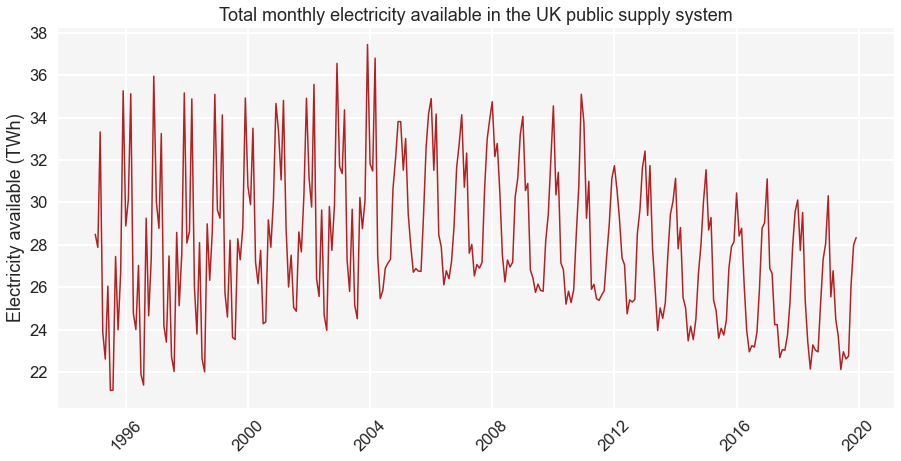

In [17]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_avail_plot_data = elec_avail.loc[(elec_avail['date'] >= start_date) & 
                                      (elec_avail['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             color='firebrick',
             data=elec_avail_plot_data).set(xlabel='',
                                            ylabel = 'Electricity available (TWh)',
                                            title='Total monthly electricity available '
                                            'in the UK public supply system');

<-- Paragraph describing the plot -->  
  
#### Last 10 years

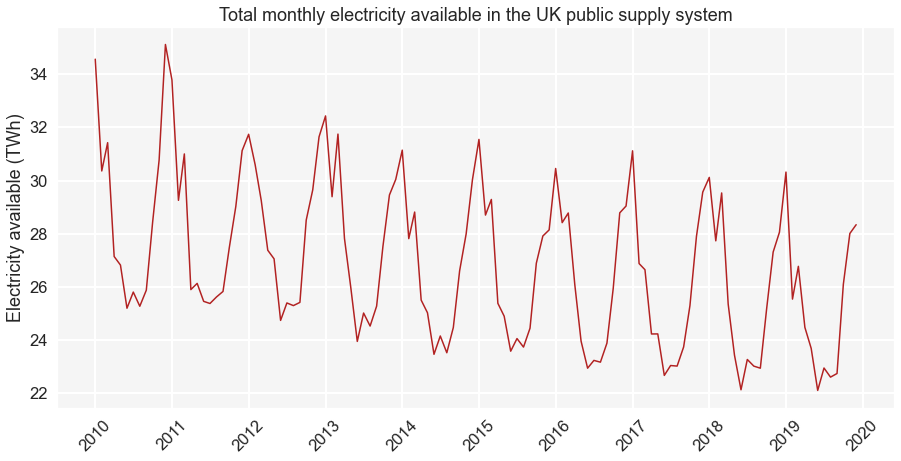

In [18]:
# Select data to plot.
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_avail_plot_data = elec_avail.loc[(elec_avail['date'] >= start_date) & 
                                      (elec_avail['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             color='firebrick',
             data=elec_avail_plot_data).set(xlabel='',
                                            ylabel = 'Electricity available (TWh)',
                                            title='Total monthly electricity available in the UK public supply system');

<-- Paragraph explaining plot -->  
  
#### Last year

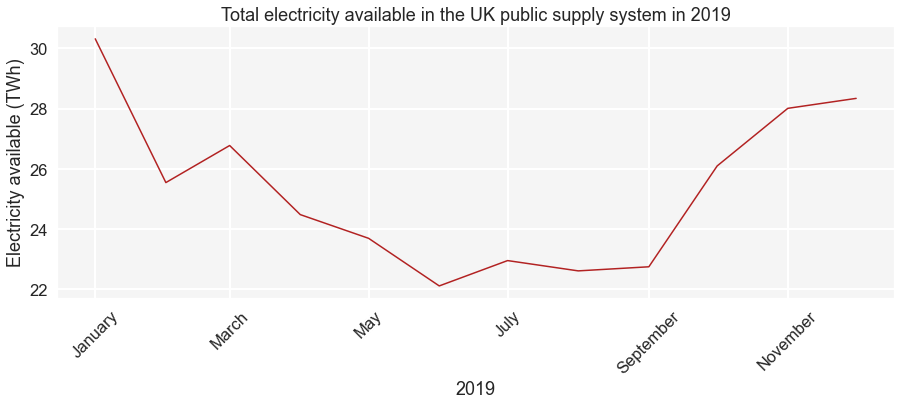

In [19]:
# Select data to plot.
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_avail_plot_data = elec_avail.loc[(elec_avail['date'] >= start_date) & 
                                      (elec_avail['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             color='firebrick',
             data=elec_avail_plot_data).set(xlabel='2019',
                                            ylabel = 'Electricity available (TWh)',
                                            title='Total electricity available in the UK '
                                            'public supply system in 2019');

### 4.2 Electricity supply by type of fuel

In [20]:
# Recap dateframe headings.
variable_names = elec_avail_type.columns

for row in variable_names:
    print(row)

date
fuel_type
electricity_available


#### All available data

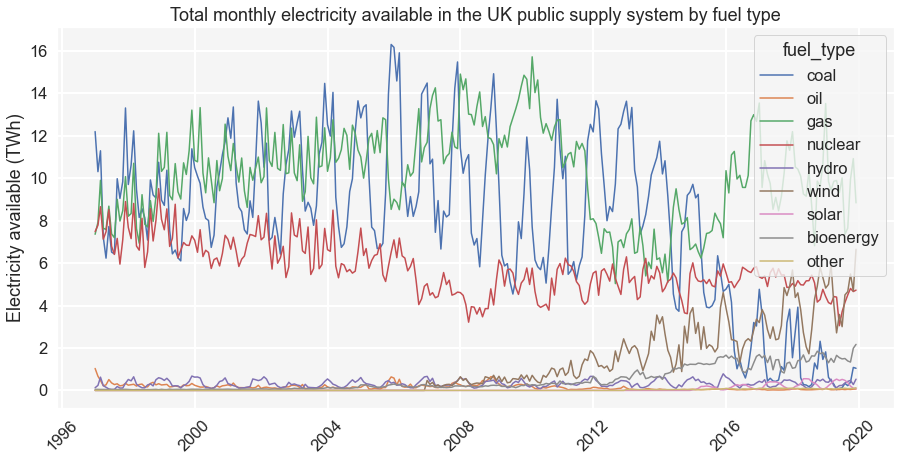

In [21]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_avail_type_plot_data = elec_avail_type.loc[(elec_avail_type['date'] >= start_date) & 
                                                (elec_avail_type['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_plot_data).set(xlabel='',
                                                  ylabel = 'Electricity available (TWh)',
                                                  title='Total monthly electricity '
                                                  'available in the UK public supply '
                                                  'system by fuel type');

<-- Paragraph explaining results -->  
  
#### Last 10 years

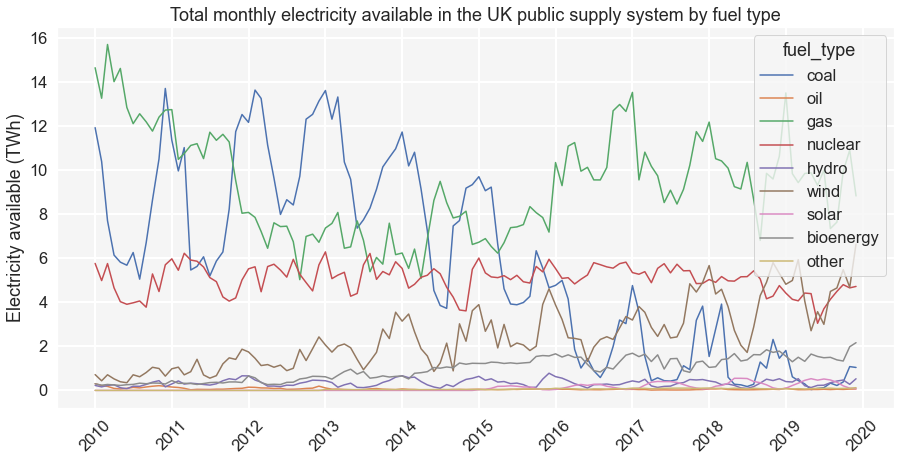

In [22]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_avail_type_plot_data = elec_avail_type.loc[(elec_avail_type['date'] >= start_date) & 
                                                (elec_avail_type['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_plot_data).set(xlabel='',
                                                  ylabel = 'Electricity available (TWh)',
                                                  title='Total monthly electricity '
                                                  'available in the UK public supply '
                                                  'system by fuel type');

#### Last year

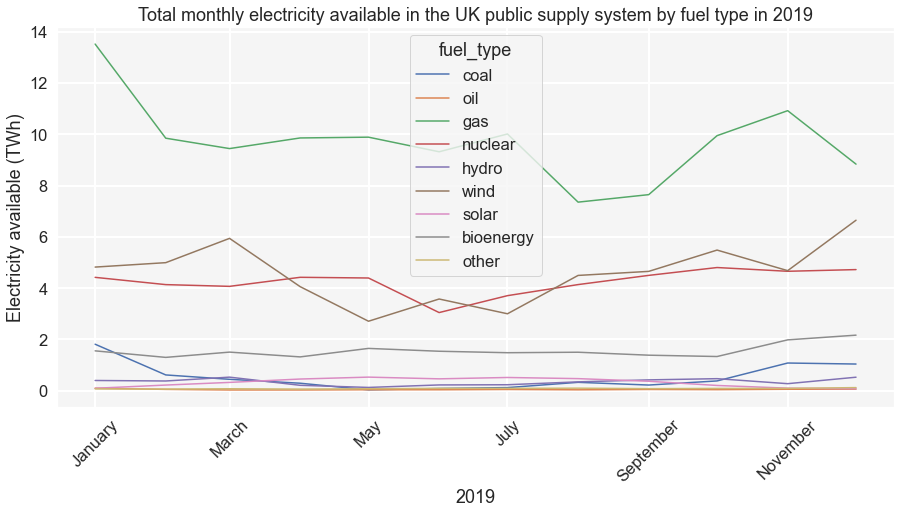

In [23]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_avail_type_plot_data = elec_avail_type.loc[(elec_avail_type['date'] >= start_date) & 
                                                (elec_avail_type['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_plot_data).set(xlabel='2019',
                                                  ylabel = 'Electricity available (TWh)',
                                                  title='Total monthly electricity '
                                                  'available in the UK public supply '
                                                  'system by fuel type in 2019');

### 4.3  Electricity supply by type of fuel (renewable vs non-renewable)

In [24]:
# Recap dateframe headings.
variable_names = elec_avail_renew.columns

for row in variable_names:
    print(row)

date
fuel_type
electricity_available


#### All available data

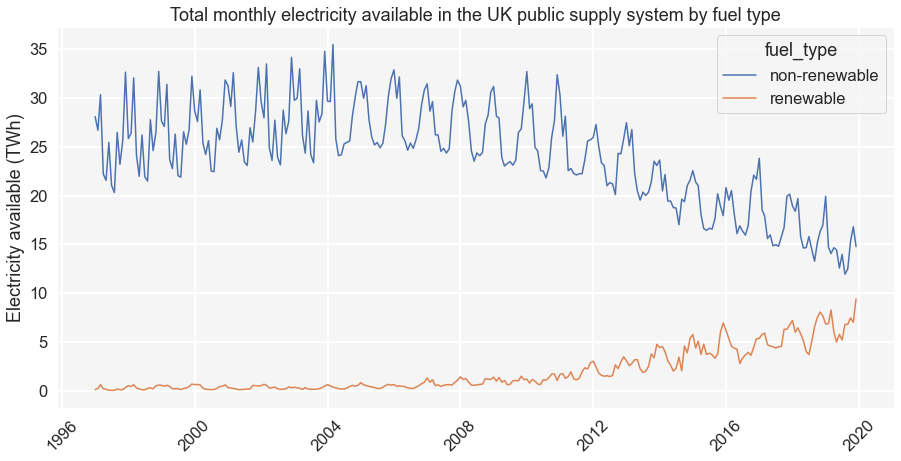

In [25]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_avail_type_renew_plot_data = elec_avail_renew.loc[(elec_avail_renew['date'] >= start_date) & 
                                                  (elec_avail_renew['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_renew_plot_data).set(xlabel='',
                                                       ylabel = 'Electricity available (TWh)',
                                                       title='Total monthly electricity '
                                                       'available in the UK public supply '
                                                       'system by fuel type');

#### Last 10 years

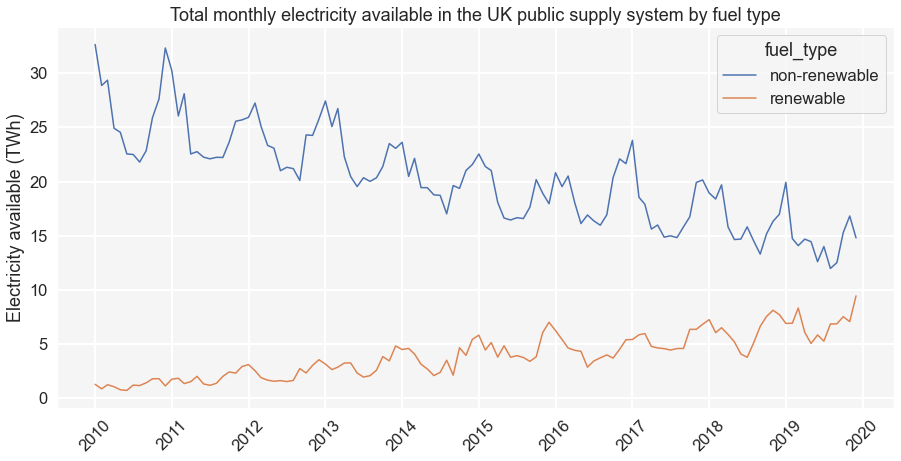

In [26]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_avail_type_renew_plot_data = elec_avail_renew.loc[(elec_avail_renew['date'] >= start_date) & 
                                                  (elec_avail_renew['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_renew_plot_data).set(xlabel='',
                                                       ylabel = 'Electricity available (TWh)',
                                                       title='Total monthly electricity '
                                                       'available in the UK public supply '
                                                       'system by fuel type');

#### Last year

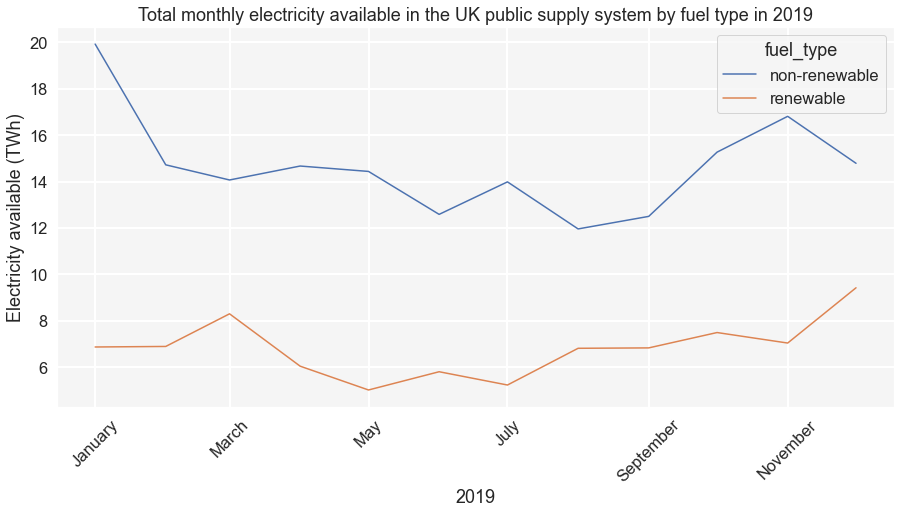

In [27]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_avail_type_renew_plot_data = elec_avail_renew.loc[(elec_avail_renew['date'] >= start_date) & 
                                                  (elec_avail_renew['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_renew_plot_data).set(xlabel='2019',
                                                       ylabel = 'Electricity available (TWh)',
                                                       title='Total monthly electricity '
                                                       'available in the UK public supply '
                                                       'system by fuel type in 2019');

### 4.4 Historic electricity demand

In [28]:
# Recap dateframe headings.
variable_names = elec_sold.columns

for row in variable_names:
    print(row)

year
month
electricity_sold_total
date


#### All available data

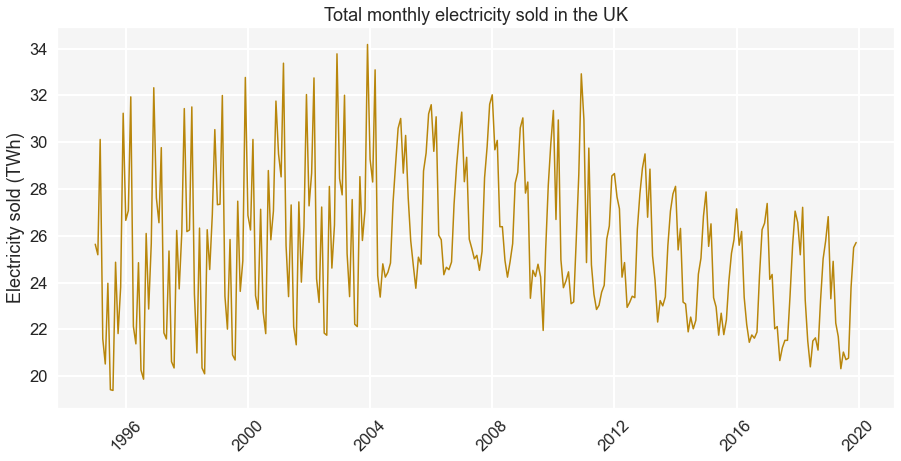

In [29]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_sold_plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                                      (elec_sold['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_sold_total', 
             color='darkgoldenrod',
             data=elec_sold_plot_data).set(xlabel='',
                                           ylabel = 'Electricity sold (TWh)',
                                           title='Total monthly electricity sold '
                                           'in the UK');

<-- Paragraph explaining plot -->  
  
#### Last 10 years

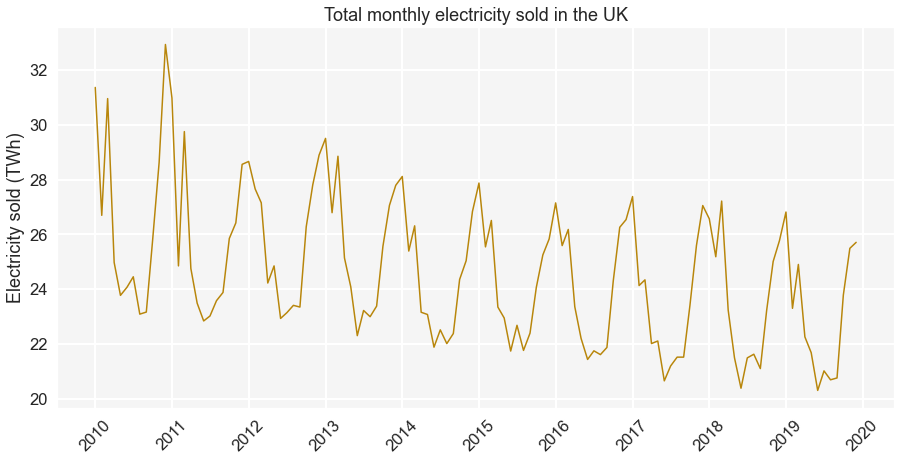

In [30]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_sold_plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                                      (elec_sold['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_sold_total', 
             color='darkgoldenrod',
             data=elec_sold_plot_data).set(xlabel='',
                                           ylabel = 'Electricity sold (TWh)',
                                           title='Total monthly electricity sold '
                                           'in the UK');

<-- Paragraph explaining plot -->  
  
#### Last year

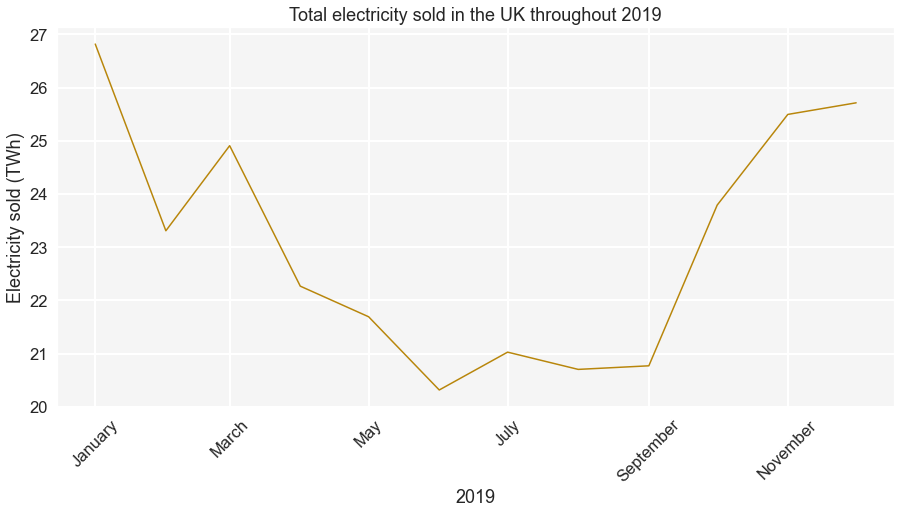

In [31]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_sold_plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                                      (elec_sold['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_sold_total', 
             color='darkgoldenrod',
             data=elec_sold_plot_data).set(xlabel='2019',
                                           ylabel = 'Electricity sold (TWh)',
                                           title='Total electricity sold '
                                           'in the UK throughout 2019');

---

## 5. The impact of COVID-19 on UK electricity supply and demand
  
### 5.1 COVID-19 movement restriction timeline

In [32]:
# Quick recap of stringency data.
stringency.head()

,date,stringency_index
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [33]:
# Function for plotting key lockdown dates.

# height = height of y-axis at which to plot text
# ax = name of axis
# title = plot title (needs to shift upwards to accommodate annotations)

def plot_dates(height, ax, title):
    
    # Shift title above text
    plt.title(title, 
          y=1.6, 
          fontsize = 20)
    
    # Symptom advice
    ax.axvline(pd.to_datetime('2020-03-13'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-03-11',
            height,
            'Stay at home with symptoms',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

    # Schools close
    ax.axvline(pd.to_datetime('2020-03-20'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-03-18',
            height,
            'Schools close',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

    # Lockdown begins
    ax.axvline(pd.to_datetime('2020-03-23'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-03-23',
            height,
            'Lockdown starts',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

    # Back to work if can't work from home
    ax.axvline(pd.to_datetime('2020-05-13'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-05-11',
            height,
            'Back to work if unable to work from home',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

    # Reception, y1 and y6 back to school
    ax.axvline(pd.to_datetime('2020-06-01'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-05-30',
            height,
            'Some year groups back to school',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

    # Quarantine from abroad
    ax.axvline(pd.to_datetime('2020-06-08'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-06-06',
            height,
            'Quarantine measures for arrivals to UK',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

    # Non-essential shops reopen
    ax.axvline(pd.to_datetime('2020-06-15'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-06-13',
            height,
            'Non-essential shops reopen',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)
    
    # Pubs, bars and restaurants reopen
    ax.axvline(pd.to_datetime('2020-07-04'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-07-02',
            height,
            'Pubs, bars and restaurants reopen',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)
    
    # Ban on wedding receptions of up to 30 people.
    ax.axvline(pd.to_datetime('2020-08-01'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-07-30',
            height,
            'Limit on wedding receptions',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)
    
    # Culture, leisure, sport and business allowed to open
    ax.axvline(pd.to_datetime('2020-08-15'), 
               color='dimgrey', 
               linestyle='--', 
               lw=2)
    ax.text('2020-08-13',
            height,
            'Culture, leisure and sport open',
            ha='left',
            rotation=45,
            color='dimgrey',
            fontsize=16)

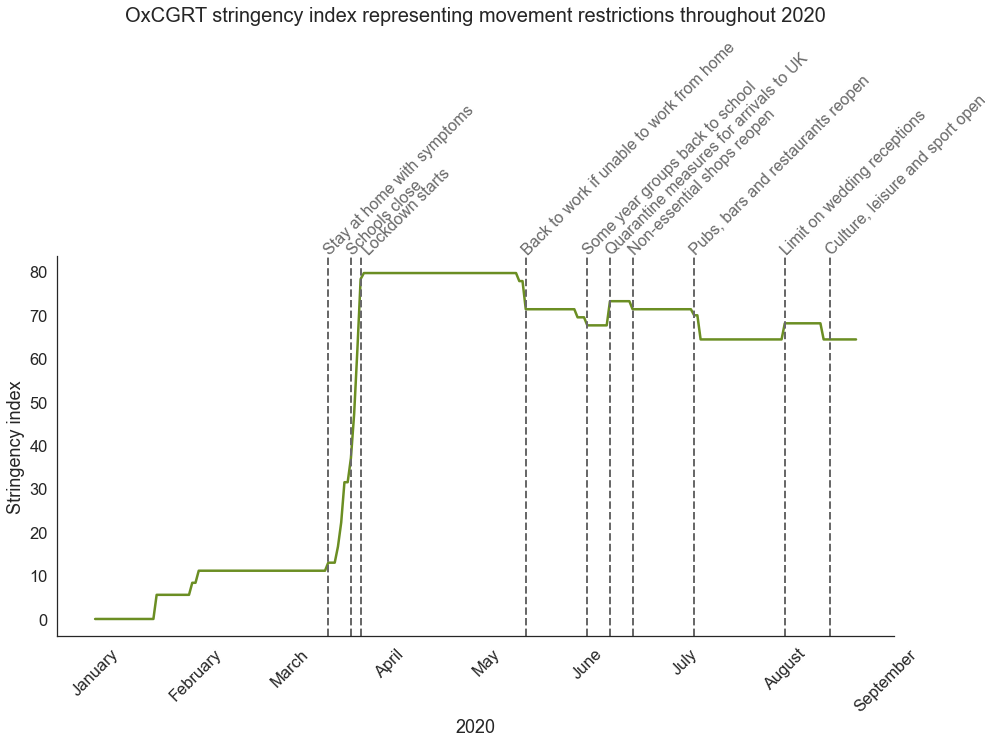

In [34]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2020-01-01'
end_date = '2020-08-23'

stringency_plot_data = stringency.loc[(stringency['date'] >= start_date) & 
                                      (stringency['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='white',
              context='notebook',
              font_scale = 1.5)
sns.set_context({'lines.linewidth': 2.5})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Remove ugly box.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot data.
sns.lineplot(x='date', 
             y='stringency_index', 
             color='olivedrab',
             data=stringency_plot_data).set(xlabel='2020',
                                            ylabel = 'Stringency index')

# Plot annotations
title = 'OxCGRT stringency index representing movement restrictions throughout 2020'

plot_dates(84, ax, title);

### 5.2 Change in the demand of electricity

#### Amount of electricity sold each month in 2020

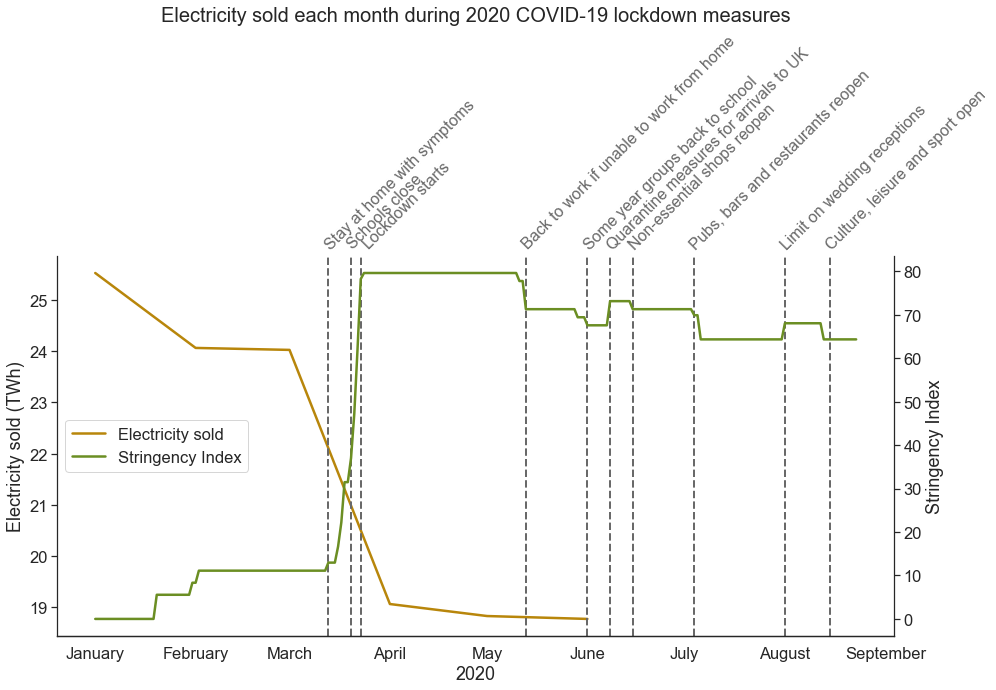

In [35]:
# Choose start and end dates.
start_date = '2020-01-01'
end_date = '2020-08-23'

# Get Python to select only the data you have asked for.
plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                          (elec_sold['date'] <= end_date)]

string_plot = stringency.loc[(stringency['date'] >= start_date) & 
                             (stringency['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='white',
              context='notebook',
              font_scale = 1.5)
sns.set_context({'lines.linewidth': 2.5})

# Plot electricity.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('2020')
ax1.set_ylabel('Electricity sold (TWh)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.plot(plot_data['date'],
         plot_data['electricity_sold_total'],
         color='darkgoldenrod',
         label='Electricity sold')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.plot(string_plot['date'], 
         string_plot['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')



# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='center left')

# Define the date format.
date_form = DateFormatter('%B')
ax1.xaxis.set_major_formatter(date_form)

# Plot annotations.
title = 'Electricity sold each month during 2020 COVID-19 lockdown measures'

plot_dates(26, ax1, title);

There is a decline in electricity sold throughout 2020. The largest decrease in demand is from March to April, coninsiding with the increase in the severity of lockdown measures as inferred from the stringency index. From looking at the [historical data](#4.4-Historic-electricity-demand) we know that electricity demand decreases into the summer months anyway. The question now is whether the decrease in electricity demand in 2020 was greater than expected and if the timing of the decrease is different to the usual pattern seen in other years.
  
The electricity sold data are not of very high resolution and also end in June. We thought it was useful to look at the demand in higher resolution.

#### Rolling electricity demand – daily average

In [36]:
# recap data
rolling_demand_d.head()

,day,demand_GW
0,2020-01-01,29766.8958
1,2020-01-02,32312.1736
2,2020-01-03,33184.1701
3,2020-01-04,31027.0729
4,2020-01-05,30484.1076


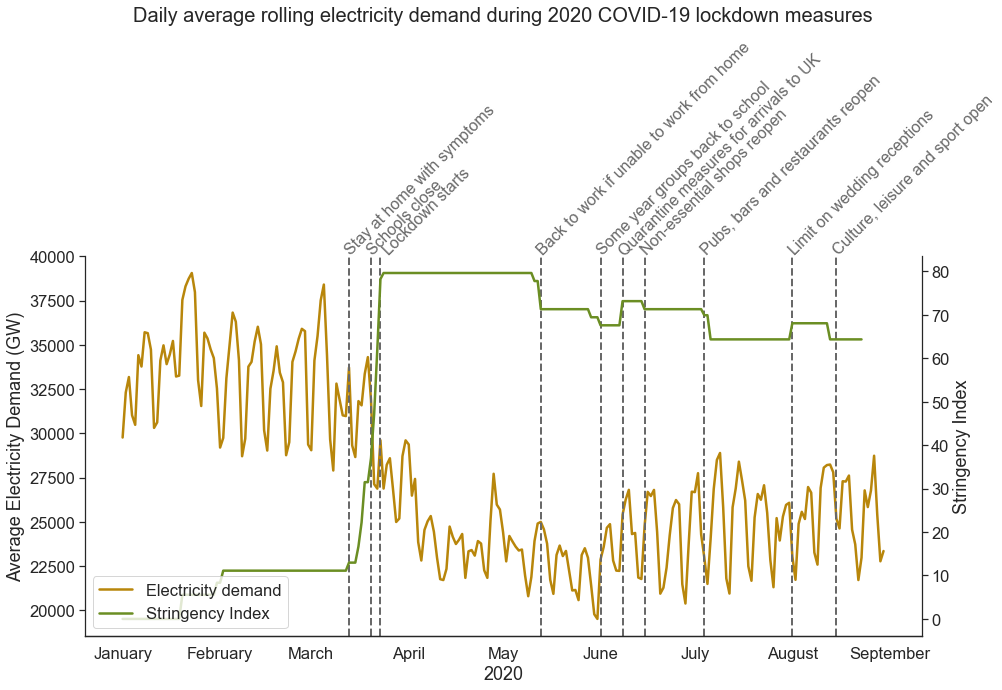

In [37]:
# Set plot style.
sns.set_theme(style='white',
              context='notebook',
              font_scale = 1.5)
sns.set_context({'lines.linewidth': 2.5})


fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('2020')
ax1.set_ylabel('Average Electricity Demand (GW)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot demand.
plt.plot(rolling_demand_d['day'],
         rolling_demand_d['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='lower left')

# Define the date format.
date_form = DateFormatter('%B')
ax1.xaxis.set_major_formatter(date_form)

# Plot annotations.
title = 'Daily average rolling electricity demand during 2020 COVID-19 lockdown measures'

plot_dates(40100, ax1, title);

There is quite a bit of noise in this data due to a greater demand in electricity on weekdays than on weekends. Although there is clearly a decrease in electricity demand after lockdown was imposed, what is perhaps more interesting is the decline in the difference between weekday and weekend electricity demand from March. These differences are evident in the two weeks preceding the full lockdown measures on the 23rd of March, suggesting people were already altering their behaviour prior to enforced restrictions. This decrease in the differences between weekday and weekend electricity demand continues into June alongside a decreasing trend in electricity demand. From June, the electricity demand starts to increase, as does the difference between weekday and weekend demand. 

There is a bit too much noise in the data to interpret overall trends. We have decided to look at the weekly average to see if we can better pick out the trends from that.

#### Rolling electricity demand – weekly average

In [38]:
# recap data
rolling_demand_wk.head()

,week,last_date_of_week,demand_GW
0,1,2020-01-05,31354.8840
1,2,2020-01-12,33605.2068
2,3,2020-01-19,34165.1002
3,4,2020-01-26,36597.0040
4,5,2020-02-02,33075.7386


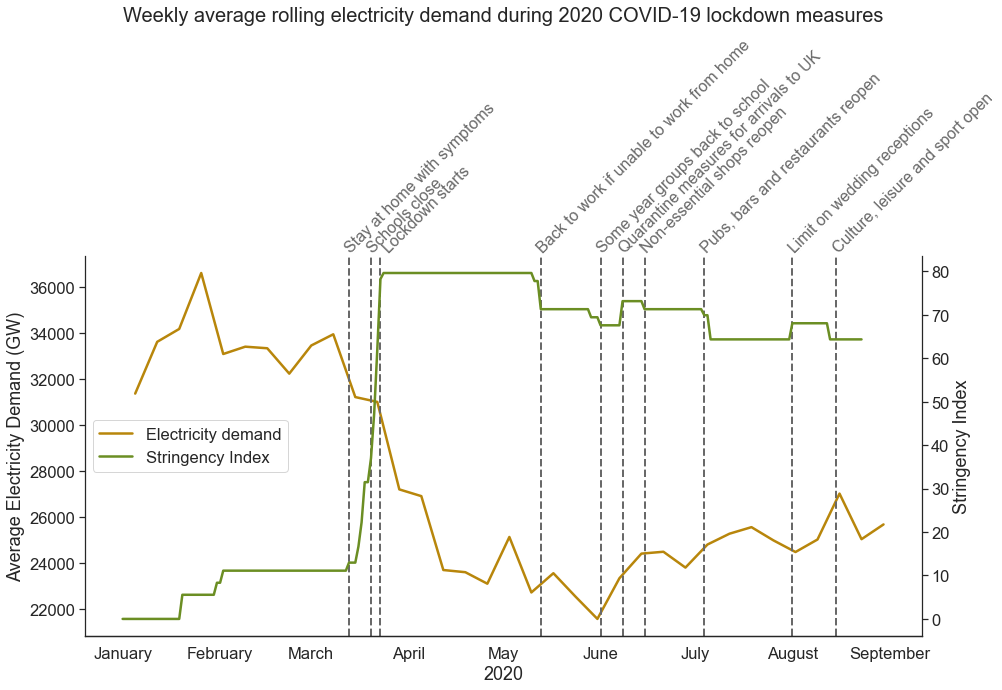

In [39]:
# Set plot style.
sns.set_theme(style='white',
              context='notebook',
              font_scale = 1.5)
sns.set_context({'lines.linewidth': 2.5})


fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('2020')
ax1.set_ylabel('Average Electricity Demand (GW)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot demand.
plt.plot(rolling_demand_wk['last_date_of_week'],
         rolling_demand_wk['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='center left')

# Define the date format.
date_form = DateFormatter('%B')
ax1.xaxis.set_major_formatter(date_form)

# Plot annotations.
title = 'Weekly average rolling electricity demand during 2020 COVID-19 lockdown measures'

plot_dates(37500, ax1, title);

##### Impact of the lockdown restrictions
On inspection of this higher resolution data, we can see that demand had started to decline just prior to the government announcement telling people to stay at home if they have symptoms. Assuming this is not due to other factors (which we will examine below) it would seem that people had already altered their behaviour before the government started imposing restrictions on peoples' movements. The greatest decrease in the demand for electricity followed the introduction of the full stay at home lockdown on the 23rd of March.

##### Impact of easing lockdown restrictions
The impact of easing lockdown restrictions on electricity demand is perhaps a bit more interesting. After some year groups went back to school, electricity demand started to increase again and continued to do so as further restrictions were eased. Electricity demand has not reached the levels seen before lockdown, although this is likely due to expected reduced demand in electricity over the summer months. There are perhaps too many other variables that effect electricity demand on these short timescales (e.g. inclement weather) to be able to say exactly which sectors reopening have caused the greatest electricity demand increases.

---

## 6. What would have happened if COVID-19 had not happened?
  
As mentioned in the [methods section](#2.-Methods), we have chosen the ARIMA model to predict what might have happened to electricity supply and demand if COVID-19 had not happened.  
  
Model prediciting how much electricity would have been sold throughout 2020 if COVID-19 hadn't happened.

---

## 7. Discussion
  
<-- Paragraph about how habbits have changed and how this has effected demand. Find sources to link to. -->  

---

## 8. Conclusion

<-- NOTES:
* electricity demand decreased as lockdown measures were put in place
* electricity demand would have decreased over this time anyway due to the warmer months of summer
* the model shows that the decrease in demand this year was greater than expected had the same trend continued into 2020  
* what we would have done if we had more time  
  
-->

---

## References

BEIS (2010) *Electricity Statistics – data sources and methodologies*, Department for Business, Energy & Industrial Strategy. Available online: https://www.gov.uk/government/publications/electricity-statistics-data-sources-and-methodologies [Accessed 2020-09-11].

BEIS (2020) *Energy Trends: UK Electricity*, Department for Business, Energy & Industrial Strategy. Available online: https://www.gov.uk/government/statistics/electricity-section-5-energy-trends [Downloaded 2020-09-12].

Elexon (2020) *Rolling Electricity Demand*, Elexon Balancing Mechanism Reporting Service (BMRS). Available online: https://www.bmreports.com/bmrs/?q=eds/main [Downloaded 2020-09-14].

Hale, T., Angrist, N., Cameron-Blake, E., Hallas, L., Kira, B., Majumdar, S., Petherick, A., Phillips, T., Tatlow, H & Webster, S. (2020) Oxford COVID-19 Government Response Tracker, Blavatnik School of Government. Available online: https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker [Downloaded 2020-09-12].